# Handwritten Number Recognition (MNIST)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import models, datasets, layers

### Splitting Data into Training and Testing Set

In [2]:
(x_train, y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Function to Plot the Image and it's Label 

In [10]:
def plot_image(x,y,index):
    plt.figure(figsize=(2,2))
    plt.imshow(x[index])
    plt.xlabel(y[index])

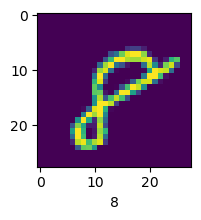

In [11]:
plot_image(x_train,y_train,59999)

### Building Artificial Neural Network

In [12]:
import tensorflow as tf
from tensorflow import keras

In [13]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 186s 99ms/step - accuracy: 0.9115 - loss: 0.2806
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 187s 100ms/step - accuracy: 0.9747 - loss: 0.0828
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 187s 100ms/step - accuracy: 0.9812 - loss: 0.0608
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 188s 100ms/step - accuracy: 0.9872 - loss: 0.0415
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 192s 102ms/step - accuracy: 0.9883 - loss: 0.0387


In [15]:
ann.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9774 - loss: 0.1011


[0.08491158485412598, 0.9793999791145325]

In [16]:
y_pred = ann.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


### Output

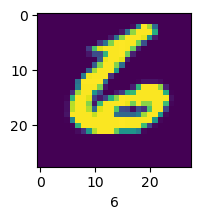

In [17]:
plot_image(x_test,y_test,9999)

In [18]:
from sklearn.metrics import classification_report

In [22]:
import numpy as np
y_pred_classes = [np.argmax(element) for element in y_pred]

### Classification Report

In [23]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

